In [3]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import imghdr
from matplotlib import pyplot as plt
import random
#loading model
model = load_model(os.path.join('models','animal_gold.h5'))
#set up a testing pool
data_dir = 'testimages'
paths = []
for image in os.listdir(data_dir):
    
    paths.append(os.path.join(data_dir,image))

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data',image_size=(224,224),shuffle=True) #building data pipelines  reestablsh the data pipeline
data.shuffle(3)
data = data.map(lambda x,y:(x/255,y))
test_size = int(len(data)*0.2)
test = data.take(test_size)

correct = 0
total = 0
for batch in test.as_numpy_iterator():
    X,y = batch
    print(len(y))
    y = list(y)
    buffer = y
    
    y_total = []
    for i in range(len(y)):
        y_abc = []
        for q in range(y[i]):
            y_abc.append(0)
        y_abc.append(1)
        for q in range(5-y[i]):
            y_abc.append(0)
        y_total.append(y_abc)
    y_total = np.array(y_total)
    yhat = model.predict(X) 
    for i in range(len(y_total)):
        if (yhat[i][4]>=0.5 and y_total[i][4]==1) or (yhat[i][4]<0.5 and y_total[i][4]!=1):
            correct +=1
        total+=1


print(correct)
print(total)

print(f'The accuracy of the algorithm on predicting if the animal is chicken or not: {correct/total}')


Found 6416 files belonging to 6 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
32
1/1 [==============================] - 1s 1s/step
32
1/1 [==============================] - 0s 391ms/step
32
1/1 [==============================] - 0s 362ms/step
32
1/1 [==============================] - 0s 330ms/step
32
1/1 [==============================] - 0s 367ms/step
32
1/1 [==============================] - 0s 356ms/step
32
1/1 [==============================] - 0s 365ms/step
32
1/1 [==============================] - 0s 352ms/step
32
1/1 [==============================] - 0s 320ms/step
32
1/1 [==============================] - 0s 311ms/step
32
1/1 [==============================] - 0s 316ms/step
32
1/1 [==============================] - 0s 318ms/step
32
1/1 [==============================] - 0s 336ms/step
32
1/1 [=========================

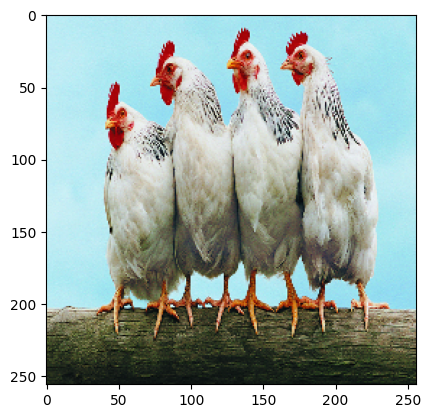

1/1 [==============================] - 0s 36ms/step
It is a chicken!


In [7]:


image_path = paths[random.randint(0,len(paths)-1)]

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()
a = model.predict(np.expand_dims(resize/255, 0))
#q = ['Coyote','Fox','Mink','Raccoon','Chicken','Dog']
if np.argmax(a)==4:
    print('It is a chicken!')
else:
    print('It is not a chicken!')

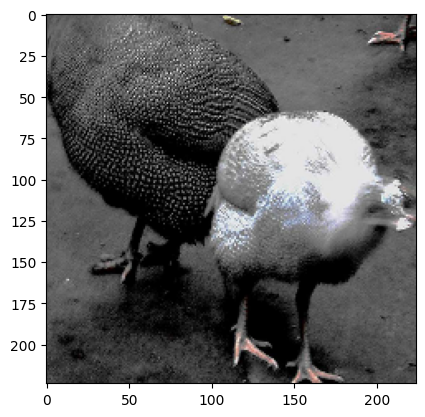

1/1 [==============================] - 0s 32ms/step
Chicken


In [22]:
image_path = paths[random.randint(0,len(paths)-1)]

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()
a = model.predict(np.expand_dims(resize/255, 0))
classes = ['Coyotes','Fox','Minks','Raccoon','Chicken','Dog']
print(classes[np.argmax(a)])